In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os

In [2]:
def get_filenames(path):
    filename=path.split()[-1].split(sep='\\')[-1]  #Extracting the filename from the complete path.
    return filename

In [4]:
columns=['center','left','right','steering','throttle','reverse','speed']
data_csv=pd.read_csv('SDCData/driving_log.csv',names=columns)

In [5]:
data_csv['center']=data_csv['center'].apply(get_filenames)
data_csv['left']=data_csv['left'].apply(get_filenames)
data_csv['right']=data_csv['right'].apply(get_filenames)
pd.set_option('display.max_colwidth',-1)
data_csv.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


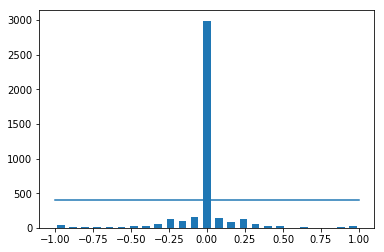

In [6]:
#Hisogram of the steering angles depending upon their numbers in training data.
hist,bins=np.histogram(data_csv['steering'],25)
center=(bins[:-1]+bins[1:])*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data_csv['steering']),np.max(data_csv['steering'])),(400,400))

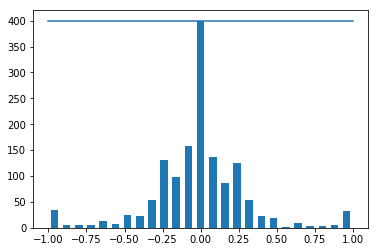

In [7]:
#Drop the extra forward steering samples.
remove_list=[]
for i in range(25):
    temp=[]
    for j in range(len(data_csv['steering'])):
      if data_csv['steering'][j]>=bins[i] and data_csv['steering'][j]<=bins[i+1]:
        temp.append(j)
    temp=shuffle(temp)
    temp=temp[400:]
    remove_list.extend(temp)
data_csv.drop(data_csv.index[remove_list],inplace=True) 
            

hist,_=np.histogram(data_csv['steering'],25)
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data_csv['steering']),np.max(data_csv['steering'])),(400,400))

In [10]:
#We are using the center image and hence we are creating the pair array of paths and their corresponding steering angles.
img_path=[]
steering_angle=[]
for i in range(len(data_csv)):
    data=data_csv.iloc[i]
    img=data[0]
    str_angle=float(data[3])
    img_path.append(os.path.join('SDCData/IMG/',img.strip()))
    steering_angle.append(str_angle)
img_path=np.asarray(img_path)
steering_angle=np.asarray(steering_angle)

In [11]:
X_train,X_valid,y_train,y_valid=train_test_split(img_path,steering_angle,test_size=0.2,random_state=6)
X_train.shape

(1170,)

Text(0.5, 1.0, 'Validation set')

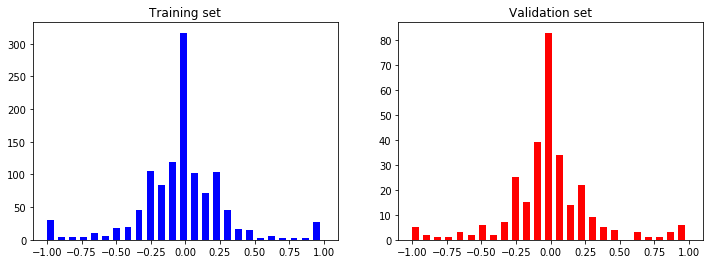

In [13]:
#Checking whether train and test data have same distribution or not.
X_train.shape
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,25,width=0.05,color='blue')
axes[0].set_title('Training set')

axes[1].hist(y_valid,25,width=0.05,color='red')
axes[1].set_title('Validation set')